In [11]:
#数据载入
from sklearn import datasets
import pandas as pd 

iris=datasets.load_iris()
#iris数据集是一个字典
list(iris.keys())


['data', 'target', 'DESCR', 'target_names', 'feature_names']

In [14]:
#数据中的别四种花
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
#我们有哪些特征
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
import numpy as np
from sklearn.linear_model import LogisticRegression

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score 
'''这部分我们先用petal wedth识别Virginica'''
X=iris['data'][:,3:]
y=(iris['target']==2).astype(np.int)#(iris['target']==2)判断是否为2返回True和False
#训练集划分
X_train,X_test, y_train, y_test  = train_test_split(
                                    X,y,test_size=0.3, random_state=520)
#建立分类器
log_reg=LogisticRegression()

#训练
log_reg.fit(X_train,y_train)
#预测
y_pred=log_reg.predict(X_test)
#准确率
accuracy_score(y_test,y_pred)


0.9777777777777777

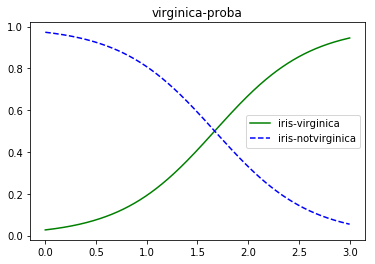

In [36]:
import matplotlib.pyplot as plt 
#打印一个模型估计花瓣宽度从0-3的概率估计
#建立一个0-3的1000组均匀分布
X_new=np.linspace(0,3,1000).reshape(-1,1)
#predict_proba返回的是概率列表【正率，反率】
y_proba=log_reg.predict_proba(X_new)
plt.plot(X_new,y_proba[:,1],'g-')
plt.plot(X_new,y_proba[:,0],'b--')
plt.legend(labels=['iris-virginica','iris-notvirginica'])
plt.title('virginica-proba')

plt.show()
#plt.plot(X_new,y_proba[:,1])